In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\Sampath\Downloads\dataset pro\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [7]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [9]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[185.5  179.5  183.5 ]
   [189.25 183.25 187.25]
   [169.25 163.25 167.25]
   ...
   [155.5  146.5  149.5 ]
   [157.75 148.75 151.75]
   [169.75 160.75 163.75]]

  [[195.5  189.5  193.5 ]
   [181.5  175.5  179.5 ]
   [183.5  177.5  181.5 ]
   ...
   [172.75 163.75 166.75]
   [170.5  161.5  164.5 ]
   [155.25 146.25 149.25]]

  [[197.25 191.25 195.25]
   [189.   183.   187.  ]
   [195.5  189.5  193.5 ]
   ...
   [171.   162.   165.  ]
   [175.   166.   169.  ]
   [158.25 149.25 152.25]]

  ...

  [[143.75 133.75 141.75]
   [134.25 124.25 132.25]
   [152.5  142.5  150.5 ]
   ...
   [125.   115.   123.  ]
   [128.5  118.5  126.5 ]
   [145.25 135.25 143.25]]

  [[151.   141.   149.  ]
   [165.75 155.75 163.75]
   [152.5  142.5  150.5 ]
   ...
   [110.75 100.75 108.75]
   [123.5  113.5  121.5 ]
   [140.25 130.25 138.25]]

  [[163.   153.   161.  ]
   [131.75 121.75 129.75]
   [143.25 133.25 141.25]
   ...
   [123.   113.   121.  ]
   [119.5  109.5  117.5 ]
   [113.   103.   11

In [11]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\Sampath\Downloads\dataset pro\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [13]:
cnn = tf.keras.models.Sequential()

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the model
cnn = Sequential()

# Add the first convolutional layer
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
# Add the second convolutional layer
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
# Add the max pooling layer
cnn.add(MaxPooling2D(pool_size=2, strides=2))

# Add more convolutional and pooling layers as needed
cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten the feature maps to feed into the dense layer
cnn.add(Flatten())

# Add a dropout layer to reduce overfitting
cnn.add(Dropout(0.25))

# Add a fully connected layer
cnn.add(Dense(units=1500, activation='relu'))

# Add another dropout layer
cnn.add(Dropout(0.4))

# Output Layer
cnn.add(Dense(units=38, activation='softmax'))

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming `training_set` and `validation_set` are your data generators
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)


C:\Users\Sampath\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 29068s 13s/step - accuracy: 0.4136 - loss: 2.0720 - val_accuracy: 0.8591 - val_loss: 0.4487
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3129s 1s/step - accuracy: 0.8457 - loss: 0.4853 - val_accuracy: 0.9195 - val_loss: 0.2544
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3131s 1s/step - accuracy: 0.9124 - loss: 0.2747 - val_accuracy: 0.9293 - val_loss: 0.2114
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4135s 2s/step - accuracy: 0.9380 - loss: 0.1896 - val_accuracy: 0.9513 - val_loss: 0.1583
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2158s 982ms/step - accuracy: 0.9545 - loss: 0.1395 - val_accuracy: 0.9427 - val_loss: 0.1841
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2667s 1s/step - accuracy: 0.9648 - loss: 0.1088 - val_accuracy: 0.9564 - val_loss: 0.1374
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2244s 1s/step - accuracy: 0.9707 - loss: 0.0891 - val_accuracy: 0.9681 - val_loss: 0.0979
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2156s 981ms/step - accuracy: 

In [18]:
# cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
#     learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
import tensorflow as tf

cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])


In [22]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 748s 339ms/step - accuracy: 0.9859 - loss: 0.0439
Training accuracy: 0.9871256947517395


In [26]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 234s 425ms/step - accuracy: 0.9595 - loss: 0.1455
Validation accuracy: 0.9606760740280151


In [32]:
cnn.save("trained_model1.h5")

In [38]:
cnn.save("trained_model1.keras")

In [40]:
training_history.history

{'accuracy': [0.6111956834793091,
  0.8666903972625732,
  0.9204779863357544,
  0.9423714280128479,
  0.9576357007026672,
  0.9668539762496948,
  0.9720321297645569,
  0.977110743522644,
  0.9805676341056824,
  0.9815065264701843],
 'loss': [1.3154075145721436,
  0.4157852828502655,
  0.24814200401306152,
  0.1763225495815277,
  0.13031138479709625,
  0.10164990276098251,
  0.08535123616456985,
  0.07083120942115784,
  0.06060875207185745,
  0.055654123425483704],
 'val_accuracy': [0.8590940237045288,
  0.919474184513092,
  0.9293193817138672,
  0.9512861371040344,
  0.9427498579025269,
  0.9563510417938232,
  0.9681311249732971,
  0.965228796005249,
  0.9666514992713928,
  0.9606760740280151],
 'val_loss': [0.4486682116985321,
  0.25435304641723633,
  0.21136610209941864,
  0.15825921297073364,
  0.18409205973148346,
  0.13740584254264832,
  0.09786158055067062,
  0.11942145973443985,
  0.1105007603764534,
  0.13663941621780396]}

In [42]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [44]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


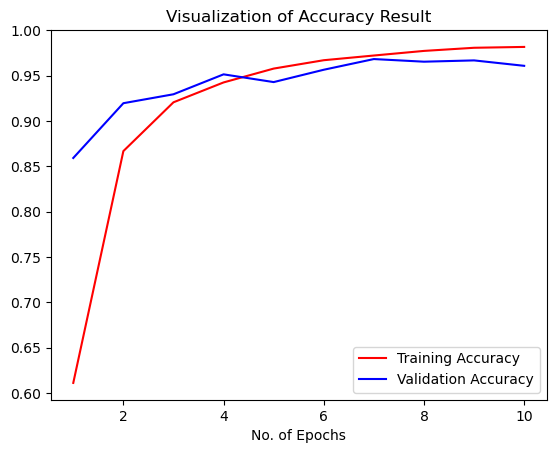

In [46]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [48]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [50]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\Sampath\Downloads\dataset pro\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [52]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 408s 23ms/step


In [54]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [56]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [58]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [60]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.97      0.97       504
                                 Apple___Black_rot       0.98      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.95      0.98      0.96       502
                               Blueberry___healthy       0.93      0.98      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.97      0.97       421
                 Cherry_(including_sour)___healthy       1.00      0.91      0.95       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.96      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.93      0.

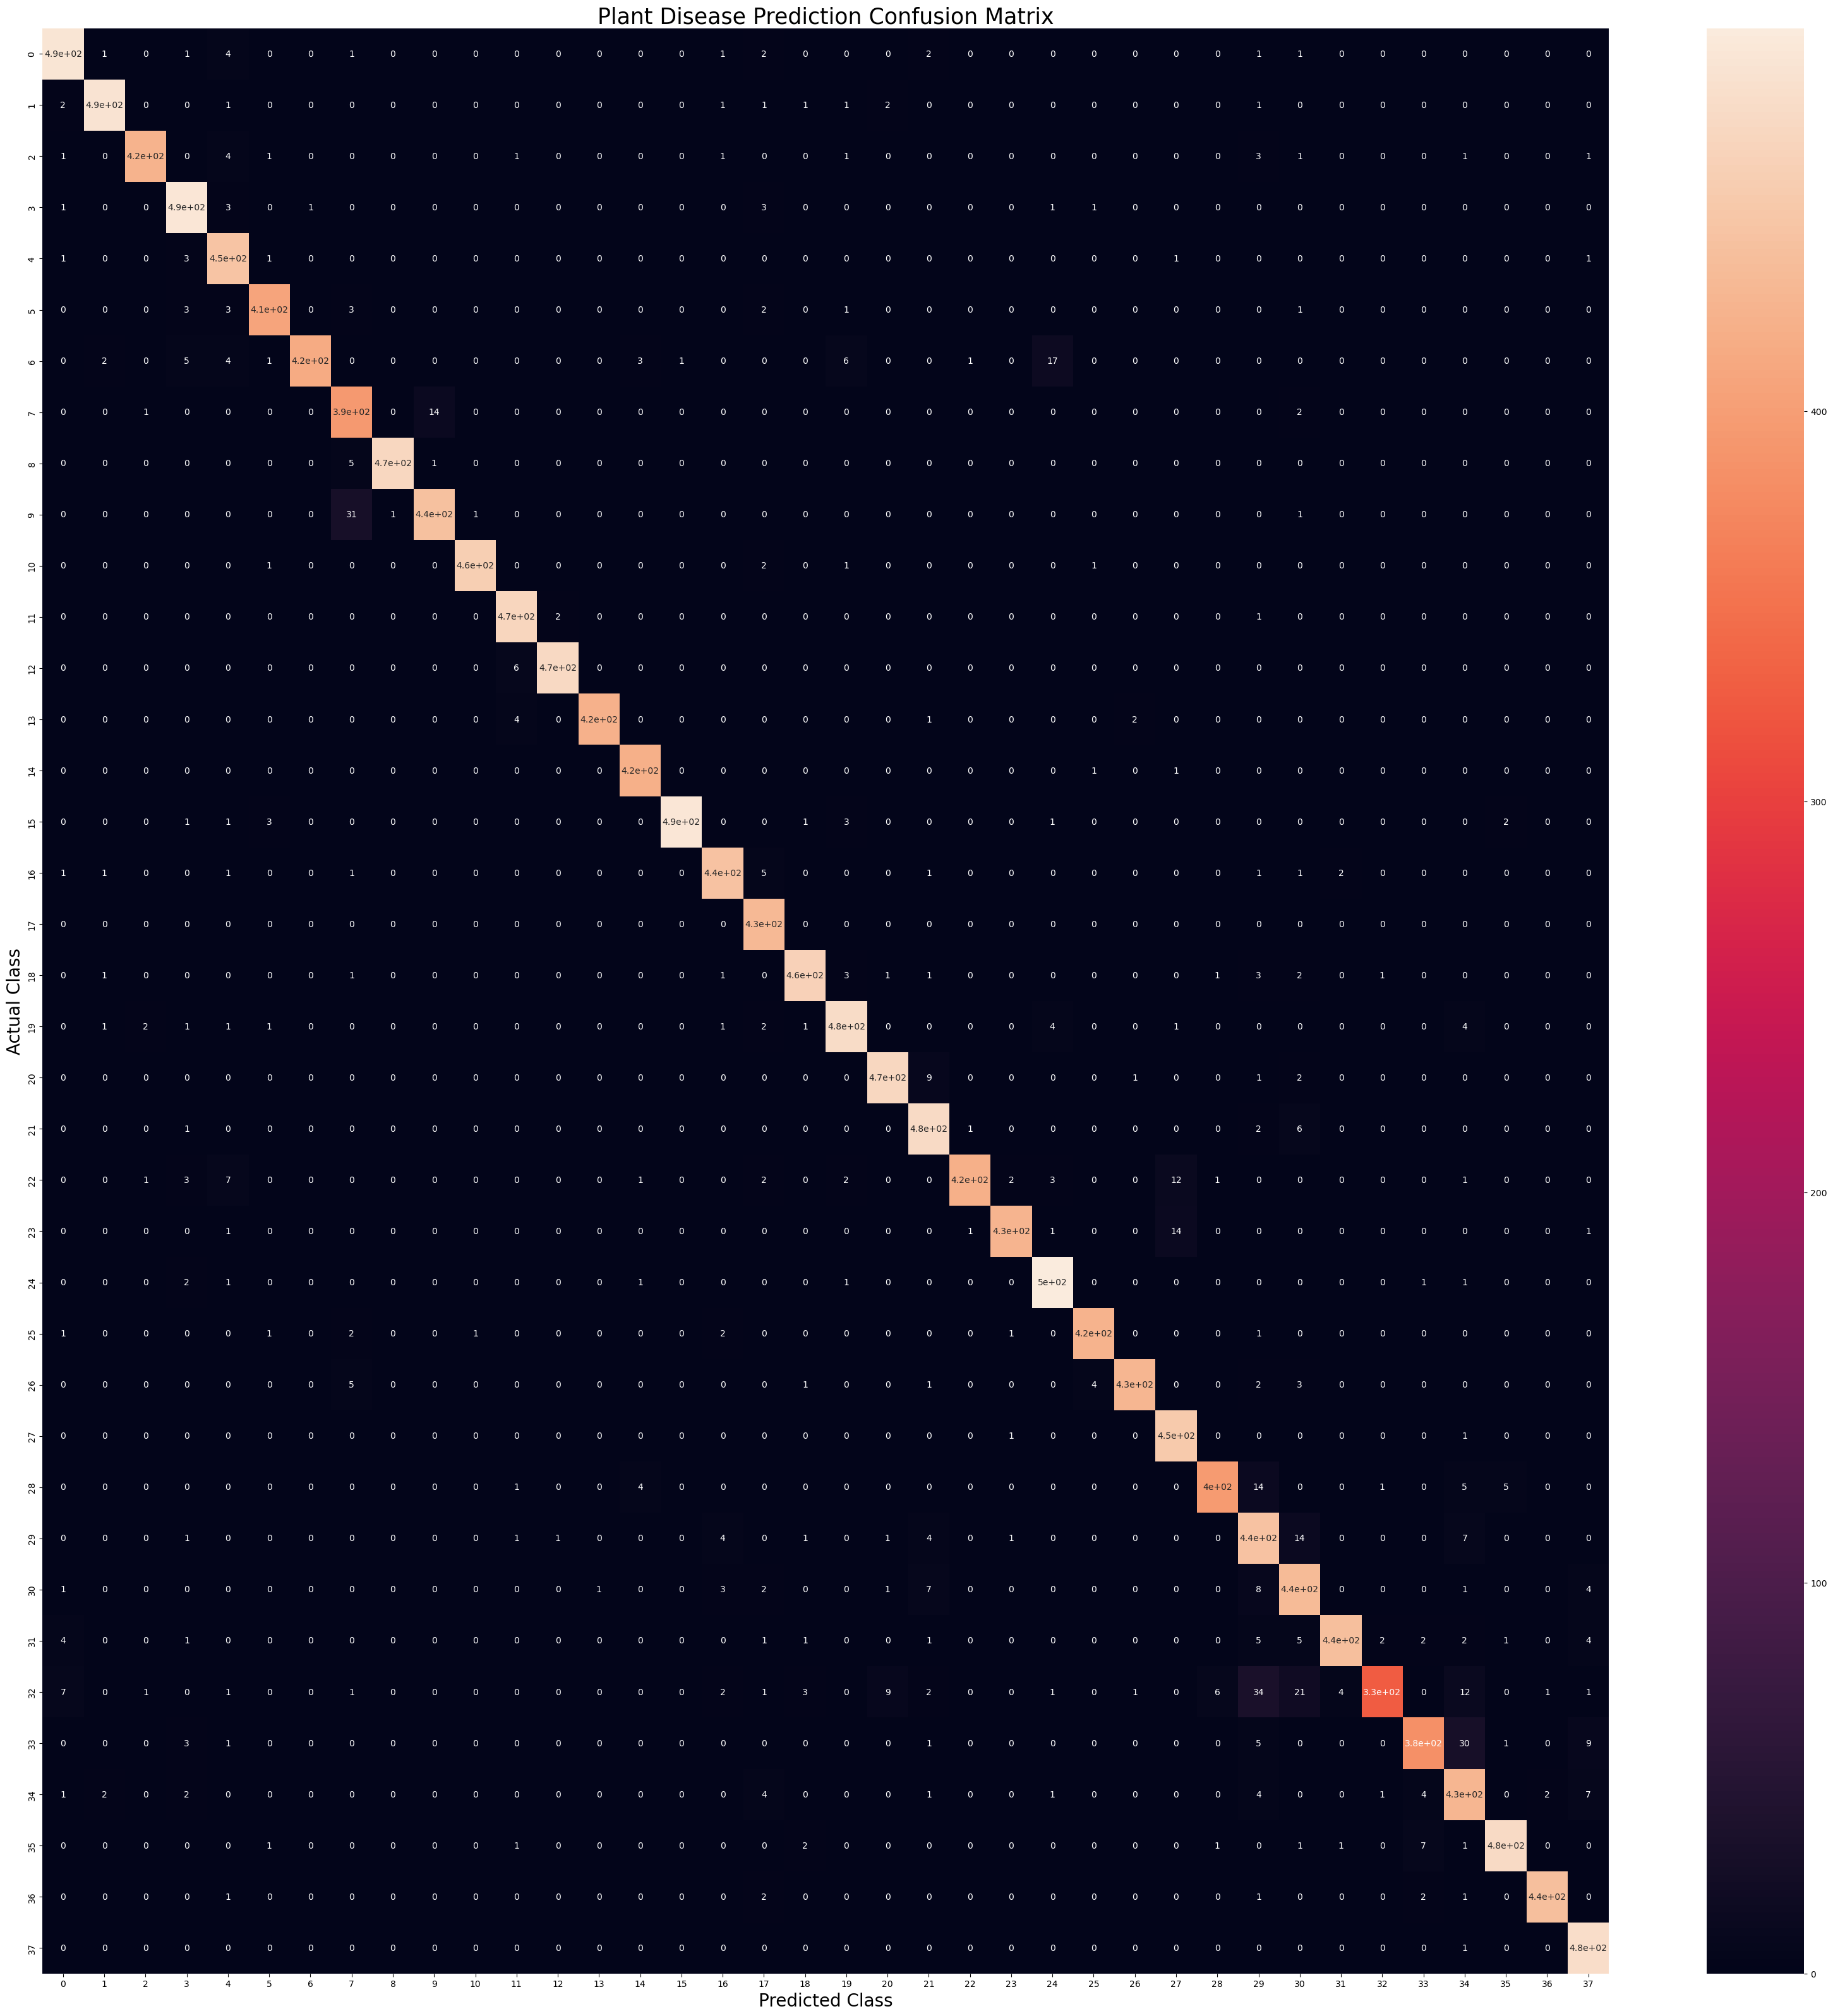

In [62]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()